17464789/17464789 [==============================] - 0s 0us/step


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           32000     
                                                                 
 dropout (Dropout)           (None, 100, 32)           0         
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 40353 (157.63 KB)
Trainable params: 40353 (157.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
157/157 - 59s - loss: 0.6007 - accuracy: 0.6622 - val_loss: 0.4646 - val_accuracy: 0.7990 - 59s/epoch - 376ms/step
Epoch 2/5
157/157 - 50s -

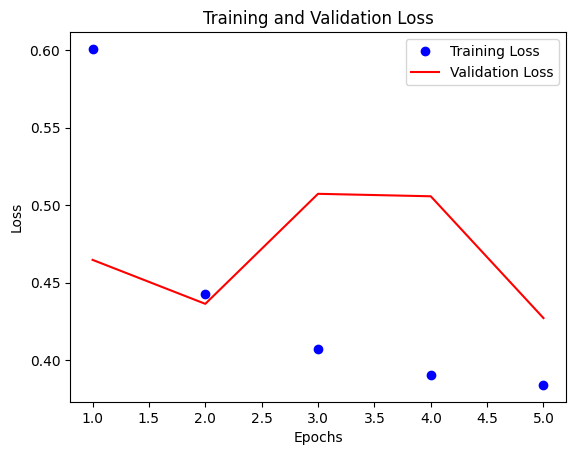

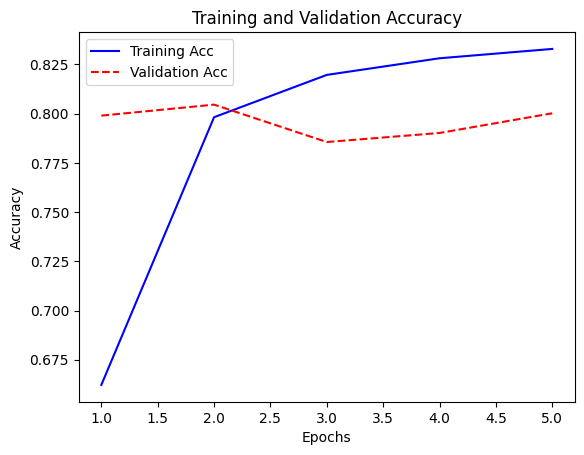

In [ ]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM

seed = 10
np.random.seed(seed)  # 指定亂數種子

# 載入 IMDb 資料集
top_words = 1000
(X_train, Y_train), (X_test, Y_test) = imdb.load_data(num_words=top_words)

# 資料預處理
max_words = 100
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

# 定義模型
model = Sequential()
model.add(Embedding(input_dim=top_words, output_dim=32, input_length=max_words))
model.add(Dropout(0.25))
model.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation="sigmoid"))
model.summary()   # 顯示模型摘要資訊

# 編譯模型
model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

# 訓練模型
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=5, batch_size=128, verbose=2)

# 評估模型
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("測試資料集的準確度 = {:.2f}".format(accuracy))

# 顯示訓練和驗證損失圖表
import matplotlib.pyplot as plt

loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "r", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# 顯示訓練和驗證準確度
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "b-", label="Training Acc")
plt.plot(epochs, val_acc, "r--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

